In [144]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# 1) tips.csv dataset contains data collected from a restaurant.

In [79]:
tips=Table.read_table('tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


# a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females.

In [145]:
average=tips.group('sex',np.mean)
average

sex,total_bill mean,tip mean,smoker mean,day mean,time mean,size mean
Female,18.0569,2.83345,,,,2.45977
Male,20.7441,3.08962,,,,2.63057


C:\Users\C20Chloe.Fleck\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


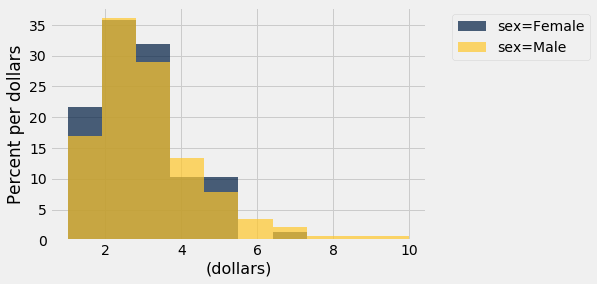

In [146]:
tips.hist('tip',group='sex',unit='dollars')

# b. repeat but broken down by time

In [147]:
time_breakdown=tips.group('time',np.mean)
time_breakdown

time,total_bill mean,tip mean,sex mean,smoker mean,day mean,size mean
Dinner,20.7972,3.10267,,,,2.63068
Lunch,17.1687,2.72809,,,,2.41176


C:\Users\C20Chloe.Fleck\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


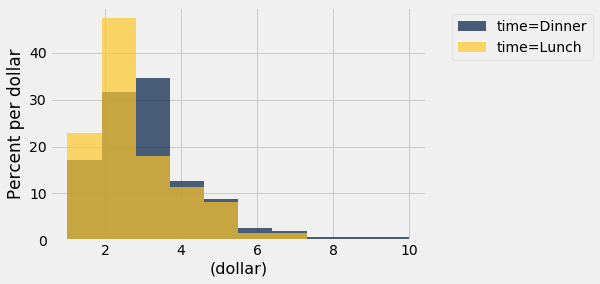

In [148]:
tips.hist('tip',group='time',unit='dollar')

# 2) Create a function called weekday_to_num. This inputs a string denoting the day and returns a number

In [149]:
def weekday_to_num(weekday):
    if input == 'Mon' :
        return 1 
    elif weekday == 'Tues' :
        return 2
    elif weekday == 'Wed' :
        return 3
    elif weekday == 'Thur' :
        return 4
    elif weekday == 'Fri' :
        return 5
    elif weekday == 'Sat' :
        return 6
    elif weekday == 'Sun' :
        return 7

# 3) Apply this function to the day column of tips and include the result as a new column called weekday_sum

In [150]:
weekday_num=tips.apply(weekday_to_num, 'day')
tips.with_column('weekday_num',weekday_num)

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


# 4) Create a function called est_tip to predict the tip amount based on the value of the bill and nearby values

In [151]:
def est_tip(bill):
    close_points=tips.where('total_bill',are.between(bill-1, bill+1))
    return close_points.column('tip').mean()

# 5) apply the function to the total_bill column of tups and inclued the result as a new column. Build a scatterplot showing predicted tip amount overlaid with actual tip amount

In [186]:
tips_with_estimate=tips.with_column('est_tip',tips.apply(est_tip,'total_bill'))
tips_with_estimate

total_bill,tip,sex,smoker,day,time,size,est_tip
16.99,1.01,Female,No,Sun,Dinner,2,2.82437
10.34,1.66,Male,No,Sun,Dinner,3,1.81136
21.01,3.5,Male,No,Sun,Dinner,3,3.3425
23.68,3.31,Male,No,Sun,Dinner,2,3.33867
24.59,3.61,Female,No,Sun,Dinner,4,3.56267
25.29,4.71,Male,No,Sun,Dinner,4,4.19909
8.77,2,Male,No,Sun,Dinner,2,1.865
26.88,3.12,Male,No,Sun,Dinner,4,3.48111
15.04,1.96,Male,No,Sun,Dinner,2,2.426
14.78,3.23,Male,No,Sun,Dinner,2,2.43833


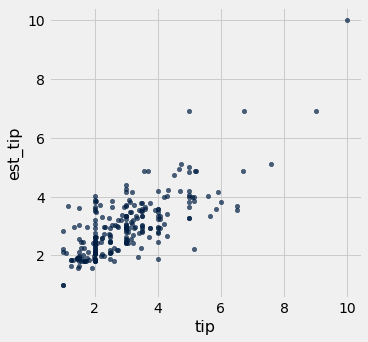

In [187]:
tips_with_estimate.scatter(1,7)